In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import datetime as dt
import os
import pickle
import sys
import imblearn
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import *
import zipfile
from zipfile import ZipFile
from urllib.request import urlopen
from io import BytesIO
import glob
import logging
import datetime
import time

C:\Users\mehta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("C:/Users/mehta/Desktop/ADS/Final_Project/Chicago_Crimes_2012_to_2017.csv")

In [3]:
data.head().T

0  \
Unnamed: 0                                        3   
ID                                         10508693   
Case Number                                HZ250496   
Date                         05/03/2016 11:40:00 PM   
Block                            013XX S SAWYER AVE   
IUCR                                           0486   
Primary Type                                BATTERY   
Description                 DOMESTIC BATTERY SIMPLE   
Location Description                      APARTMENT   
Arrest                                         True   
Domestic                                       True   
Beat                                           1022   
District                                         10   
Ward                                             24   
Community Area                                   29   
FBI Code                                        08B   
X Coordinate                            1.15491e+06   
Y Coordinate                            1.89368e+06   
Year                                           2016   
Updated On                   05/10/2016 03:56:50 PM   
Latitude                                    41.8641   
Longitude                                  -87.7068   
Location              (41.864073157, -87.706818608)   

                                                 1  \
Unnamed: 0                                      89   
ID                                        10508695   
Case Number                               HZ250409   
Date                        05/03/2016 09:40:00 PM   
Block                           061XX S DREXEL AVE   
IUCR                                          0486   
Primary Type                               BATTERY   
Description                DOMESTIC BATTERY SIMPLE   
Location Description                     RESIDENCE   
Arrest                                       False   
Domestic                                      True   
Beat                                           313   
District                                         3   
Ward                                            20   
Community Area                                  42   
FBI Code                                       08B   
X Coordinate                           1.18307e+06   
Y Coordinate                           1.86433e+06   
Year                                          2016   
Updated On                  05/10/2016 03:56:50 PM   
Latitude                                   41.7829   
Longitude                                 -87.6044   
Location              (41.782921527, -87.60436317)   

                                                  2  \
Unnamed: 0                                      197   
ID                                         10508697   
Case Number                                HZ250503   
Date                         05/03/2016 11:31:00 PM   
Block                           053XX W CHICAGO AVE   
IUCR                                           0470   
Primary Type                 PUBLIC PEACE VIOLATION   
Description                        RECKLESS CONDUCT   
Location Description                         STREET   
Arrest                                        False   
Domestic                                      False   
Beat                                           1524   
District                                         15   
Ward                                             37   
Community Area                                   25   
FBI Code                                         24   
X Coordinate                            1.14079e+06   
Y Coordinate                            1.90482e+06   
Year                                           2016   
Updated On                   05/10/2016 03:56:50 PM   
Latitude                                    41.8949   
Longitude                                  -87.7584   
Location              (41.894908283, -87.758371958)   

                                                  3  \
Unnamed: 0                                      673   
I

In [4]:
data['Primary Type'].value_counts()

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [5]:
data['Primary Type'].replace(['NON - CRIMINAL'], ['NON-CRIMINAL'], inplace=True)

In [7]:
data.dropna(subset=['Community Area'], how = 'any', inplace = True)
data.dropna(subset=['Case Number'], how = 'any', inplace = True)
data.dropna(subset=['Ward'], how = 'any', inplace = True)
data.dropna(subset=['District'], how = 'any', inplace = True)
data.dropna(subset=['X Coordinate'], how = 'any', inplace = True)
data.dropna(subset=['Y Coordinate'], how = 'any', inplace = True)
data.dropna(subset=['Latitude'], how = 'any', inplace = True)
data.dropna(subset=['Longitude'], how = 'any', inplace = True)
data.dropna(subset=['Location'], how = 'any', inplace = True)
max_browser = pd.DataFrame(data.groupby('Location Description').size().rename('cnt')).idxmax()[0]
data['Location Description'] = data['Location Description'].fillna(max_browser)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1419591 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1419591 non-null int64
ID                      1419591 non-null int64
Case Number             1419591 non-null object
Date                    1419591 non-null object
Block                   1419591 non-null object
IUCR                    1419591 non-null object
Primary Type            1419591 non-null object
Description             1419591 non-null object
Location Description    1419591 non-null object
Arrest                  1419591 non-null bool
Domestic                1419591 non-null bool
Beat                    1419591 non-null int64
District                1419591 non-null float64
Ward                    1419591 non-null float64
Community Area          1419591 non-null float64
FBI Code                1419591 non-null object
X Coordinate            1419591 non-null float64
Y Coordinate            1419591 non-null float64
Year                    1

In [9]:
x = pd.get_dummies(data['Primary Type'])

In [10]:
data = data.drop('Primary Type',axis = 1)
data = data.join(x)

In [11]:
data.head().T

0  \
Unnamed: 0                                                     3   
ID                                                      10508693   
Case Number                                             HZ250496   
Date                                      05/03/2016 11:40:00 PM   
Block                                         013XX S SAWYER AVE   
IUCR                                                        0486   
Description                              DOMESTIC BATTERY SIMPLE   
Location Description                                   APARTMENT   
Arrest                                                      True   
Domestic                                                    True   
Beat                                                        1022   
District                                                      10   
Ward                                                          24   
Community Area                                                29   
FBI Code                                                     08B   
X Coordinate                                         1.15491e+06   
Y Coordinate                                         1.89368e+06   
Year                                                        2016   
Updated On                                05/10/2016 03:56:50 PM   
Latitude                                                 41.8641   
Longitude                                               -87.7068   
Location                           (41.864073157, -87.706818608)   
ARSON                                                          0   
ASSAULT                                                        0   
BATTERY                                                        1   
BURGLARY                                                       0   
CONCEALED CARRY LICENSE VIOLATION                              0   
CRIM SEXUAL ASSAULT                                            0   
CRIMINAL DAMAGE                                                0   
CRIMINAL TRESPASS                                              0   
DECEPTIVE PRACTICE                                             0   
GAMBLING                                                       0   
HOMICIDE                                                       0   
HUMAN TRAFFICKING                                              0   
INTERFERENCE WITH PUBLIC OFFICER                               0   
INTIMIDATION                                                   0   
KIDNAPPING                                                     0   
LIQUOR LAW VIOLATION                                           0   
MOTOR VEHICLE THEFT                                            0   
NARCOTICS                                                      0   
NON-CRIMINAL                                                   0   
NON-CRIMINAL (SUBJECT SPECIFIED)                               0   
OBSCENITY                                                      0   
OFFENSE INVOLVING CHILDREN                                     0   
OTHER NARCOTIC VIOLATION                                       0   
OTHER OFFENSE                                                  0   
PROSTITUTION                                                   0   
PUBLIC INDECENCY                                               0   
PUBLIC PEACE VIOLATION                                         0   
ROBBERY                                                        0   
SEX OFFENSE                                                    0   
STALKING                                                       0   
THEFT                                                          0   
WEAPONS VIOLATION                                              0   

                                                              1  \
Unnamed: 0                                                   89   
ID                                                     10508695   
Case Number                                            HZ250409   
Date                                     05/03/2016 09

In [12]:
data.isnull().sum()

Unnamed: 0                           0
ID                                   0
Case Number                          0
Date                                 0
Block                                0
IUCR                                 0
Description                          0
Location Description                 0
Arrest                               0
Domestic                             0
Beat                                 0
District                             0
Ward                                 0
Community Area                       0
FBI Code                             0
X Coordinate                         0
Y Coordinate                         0
Year                                 0
Updated On                           0
Latitude                             0
Longitude                            0
Location                             0
ARSON                                0
ASSAULT                              0
BATTERY                              0
BURGLARY                 

In [13]:
data.shape

(1419591, 54)

In [15]:
data.isnull().sum()

Unnamed: 0                           0
ID                                   0
Case Number                          0
Date                                 0
Block                                0
IUCR                                 0
Description                          0
Location Description                 0
Arrest                               0
Domestic                             0
Beat                                 0
District                             0
Ward                                 0
Community Area                       0
FBI Code                             0
X Coordinate                         0
Y Coordinate                         0
Year                                 0
Updated On                           0
Latitude                             0
Longitude                            0
Location                             0
ARSON                                0
ASSAULT                              0
BATTERY                              0
BURGLARY                 

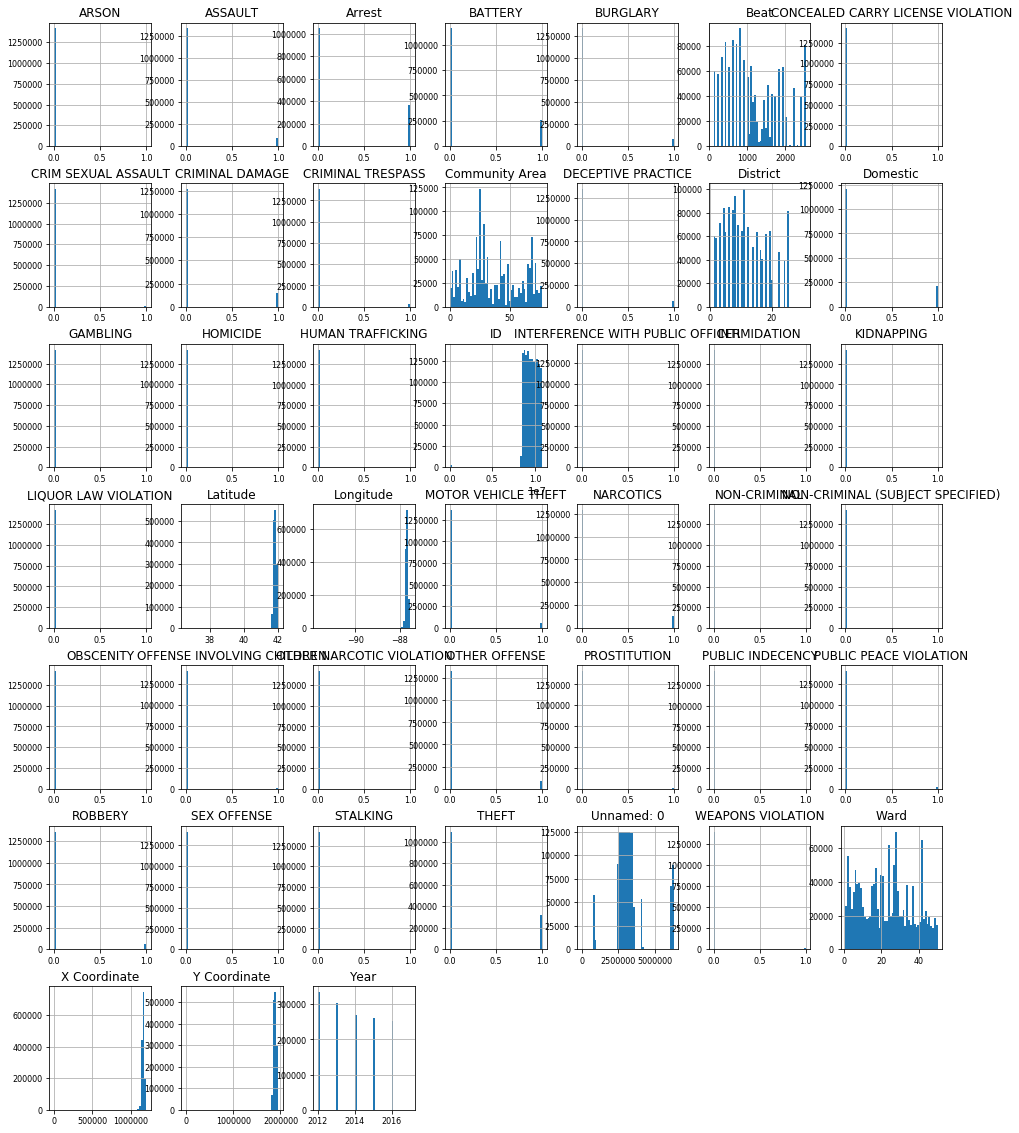

In [16]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

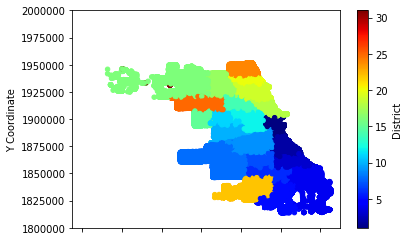

In [29]:
data.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', c='District', cmap=plt.get_cmap('jet'))
plt.xlim(1075000,1210000)
plt.ylim(1800000, 2000000)
plt.figure(figsize=(30,30))

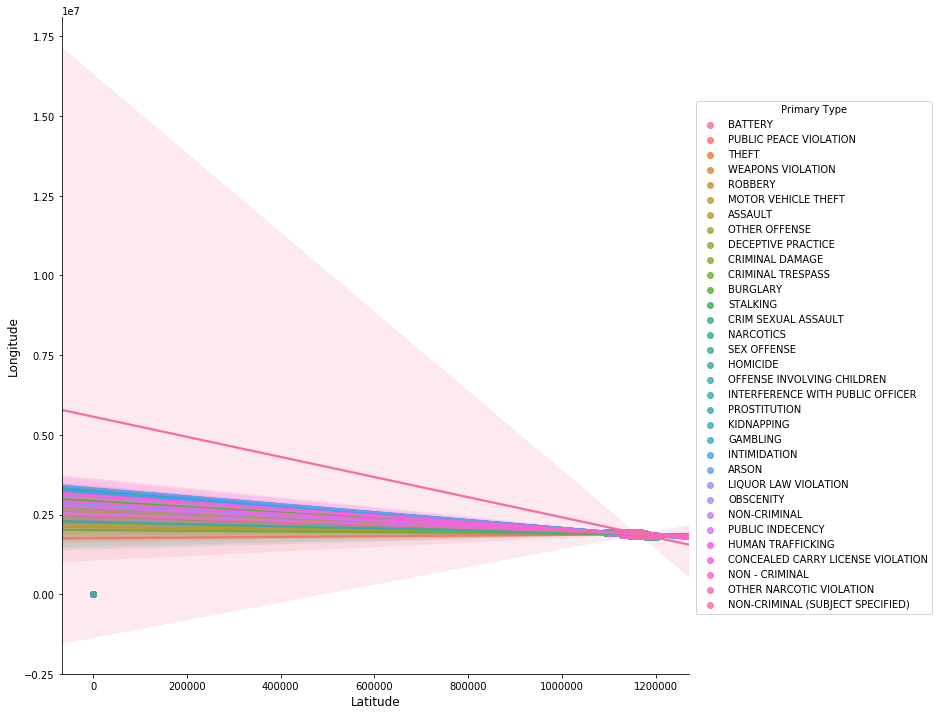

In [30]:
plt.figure(figsize=(50,50))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, hue='Primary Type', data=data, fit_reg=True)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [17]:
del data['Unnamed: 0']

In [18]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'ARSON',
       'ASSAULT', 'BATTERY', 'BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION',
       'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION'],
      dtype='object')

In [ ]:
data['Arrest'].value_counts()

In [20]:
def split_dataset(dataset):
    #data = feature_engineering(dataset)
    print("Spliting dataset")
    X=data[['ID', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'X Coordinate',
       'Y Coordinate', 'Year', 'Latitude', 'Longitude','ARSON',
       'ASSAULT', 'BATTERY', 'BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION',
       'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION'
       ]]
    y=data[['Arrest']]
    return X, y

In [21]:
def sampling(dataset):
    X,y  = split_dataset(dataset)
    print("Oversampling")
    sm = SMOTE(random_state=12, ratio = 1.0)
    x_res, y_res = sm.fit_sample(X, y)
    return x_res,y_res

In [34]:
def train_test(dataset):
    x_res, y_res = split_dataset(dataset)
    print("Training and testing")
    x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .2,
                                                    random_state=12)
    return x_train_res, x_val_res, y_train_res, y_val_res 

In [23]:
def random_forest(dataset):
    print("Random forest pickling")
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
    rf = RandomForestClassifier(n_estimators=40, max_depth=10)
    rf.fit(x_train_res, y_train_res)

    filename = 'rf_model.pckl'
    pickle.dump(rf, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    RandomForest_model = pickle.load(open(filename, 'rb'))
    return RandomForest_model

In [24]:
def k_n(dataset):
    print("KNN pickling")
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
# instantiate learning model (k = 3)
    knn = KNeighborsClassifier(n_neighbors=4)

# fitting the model
    knn.fit(x_train_res, y_train_res)
    filename = 'knn_model.pckl'
    pickle.dump(knn, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    K_nearest_model = pickle.load(open(filename, 'rb'))
    return K_nearest_model

In [25]:
def logReg(dataset):
    print("Log Regression pickling")
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
# instantiate learning model (k = 3)
    lr = LogisticRegression()

# fitting the model
    lr.fit(x_train_res, y_train_res)
    filename = 'lr_model.pckl'
    pickle.dump(lr, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    Log_Reg_model = pickle.load(open(filename, 'rb'))
    return Log_Reg_model

In [26]:
def BernouNb(dataset):
    print("Bernoulli pickling")
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
# instantiate learning model (k = 3)
    bnb = BernoulliNB()

# fitting the model
    bnb.fit(x_train_res, y_train_res)
    filename = 'bnb_model.pckl'
    pickle.dump(bnb, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    Bernoulli_Nb_model = pickle.load(open(filename, 'rb'))
    return Bernoulli_Nb_model

In [27]:
def ex_tr(dataset):
    print("Extra Tree Classifier")

    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
# instantiate learning model (k = 3)
    extr = ExtraTreesClassifier(n_estimators = 50, random_state = 123)

# fitting the model
    extr.fit(x_train_res, y_train_res)
    filename = 'extra_tree_model.pckl'
    pickle.dump(extr, open(filename, 'wb'))
 
    # some time later...
 
    # load the model from disk
    Extra_Tree_model = pickle.load(open(filename, 'rb'))
    return Extra_Tree_model

In [28]:
def models(dataset):
    print("Models")
    randomForest_model = random_forest(dataset)
    K_nearest_model = k_n(dataset)
    Log_Reg_model = logReg(dataset)
    Bernoulli_Nb_model = BernouNb(dataset)
    Extra_Tree_model = ex_tr(dataset)
    #ExtraTreez_model = xtraTree(dataset)
    model = [randomForest_model,
             K_nearest_model,
             Log_Reg_model,
             Bernoulli_Nb_model,
             Extra_Tree_model
             #ExtraTreez_model
             #RandomForestClassifier(n_estimators=40, max_depth=10),
             #KNeighborsClassifier(n_neighbors=4),
             #LogisticRegression(),
             #BernoulliNB(),
             #ExtraTreesClassifier(n_estimators = 500 , random_state = 123)
            ]
    #import os
    #here = os.path.dirname(os.path.abspath(__file__)
    #with open(os.path.join("models.pckl"), 'wb') as filename:
    #    for models in model:
    #        print("loop")
    #        pickle.dump(models, filename)
    #        print("dumped")
    return(model)

In [29]:
def fit_model(model, dataset):
    print("Metrics evaluating")
    x_train_res, x_val_res, y_train_res, y_val_res = train_test(dataset)
    print("Model fitting")
    #model.fit(x_train_res,y_train_res)
    prediction = model.predict(x_val_res)
    f1score = f1_score(y_val_res, prediction)
    accuracy = accuracy_score(y_val_res, prediction)
    cm = confusion_matrix(y_val_res, prediction)
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    
    return f1score,accuracy,tp,fp,fn,tn

In [30]:
def accuracyscore(dataset):
	print("Returning scores")
#    models = []
#    #here = os.path.dirname(os.path.abspath(__file__))
#    with open(os.path.join("models.pckl"), 'rb') as filename:
#        while True:
#            try:
#                print("trying")
#                models.append(pickle.load(filename))
#                print("appended")
#            except EOFError:
#                break
#    print(models)
	model = models(dataset)
	accuracy =[]
	model_name =[]
	f1score = []
	true_positive =[]
	false_positive =[]
	true_negative =[]
	false_negative =[]
	for i in range(0,len(model)):
		f,a,tp,fp,fn,tn = fit_model(model[i],dataset)
		model_name.append(str(model[i]).split("(")[0])
		f1score.append(f)
		accuracy.append(a)
		#matrix.append(cm)
		true_positive.append(tp) 
		false_positive.append(fp)
		true_negative.append(fn) 
		false_negative.append(tn)    
	return model_name,f1score,accuracy,true_positive,false_positive,true_negative,false_negative

In [31]:
def performance_metrics(dataset):
    #models()
    print("Ranking of the models")
    summary2 = accuracyscore(dataset)
    print("Accuracy Score")
    describe1 = pd.DataFrame(summary2[0],columns = {"Model_Name"})
    describe2 = pd.DataFrame(summary2[1],columns = {"F1_score"})
    describe3 = pd.DataFrame(summary2[2], columns ={"Accuracy_score"})
    describe4 = pd.DataFrame(summary2[3], columns ={"True_Positive"})
    describe5 = pd.DataFrame(summary2[4], columns ={"False_Positive"})
    describe6 = pd.DataFrame(summary2[5], columns ={"True_Negative"})
    describe7 = pd.DataFrame(summary2[6], columns ={"False_Negative"})
    des = describe1.merge(describe2, left_index=True, right_index=True, how='inner')
    des = des.merge(describe3,left_index=True, right_index=True, how='inner')
    des = des.merge(describe4,left_index=True, right_index=True, how='inner')
    des = des.merge(describe5,left_index=True, right_index=True, how='inner')
    des = des.merge(describe6,left_index=True, right_index=True, how='inner')
    des = des.merge(describe7,left_index=True, right_index=True, how='inner')
    final_csv = des.sort_values(ascending=False,by="Accuracy_score").reset_index(drop = True)
    return final_csv

In [32]:
def zipping(path,ziph):
    ziph.write(os.path.join('lr_model.pckl'))
    ziph.write(os.path.join('rf_model.pckl'))
    ziph.write(os.path.join('extra_tree_model.pckl'))
    ziph.write(os.path.join('bnb_model.pckl'))
    ziph.write(os.path.join('knn_model.pckl'))

In [ ]:
final_csv = performance_metrics(data)
final_csv.to_csv(str(os.getcwd()) + "/Accuracy_error_metrics.csv")  

Ranking of the models
Returning scores
Models
Random forest pickling
Spliting dataset
Training and testing


C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


KNN pickling
Spliting dataset
Training and testing


C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Log Regression pickling
Spliting dataset
Training and testing


C:\Users\mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bernoulli pickling
Spliting dataset
Training and testing
Extra Tree Classifier
Spliting dataset
Training and testing


C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
